In [2]:
import pandas as pd
import re
from collections import defaultdict
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
    

In [3]:
with open("extended_data.csv", "r") as input:
    with open('skills.json') as skills_file:
        SKILLS = json.load(skills_file)
        data = pd.read_csv(input)

In [4]:
data['location'].value_counts()

location
Москва             206
Санкт-Петербург    202
Екатеринбург       200
Нижний Новгород    199
Новосибирск        195
Казань             194
Name: count, dtype: int64

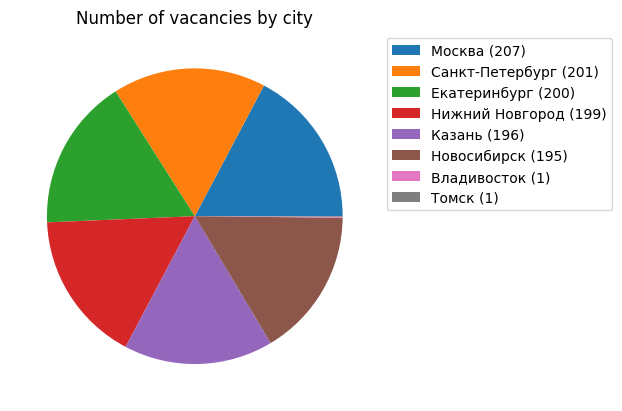

In [5]:
loc_counts = data['location'].value_counts()
plt.pie(loc_counts)
plt.legend(loc='upper left',
    bbox_to_anchor=(1, 1),  # Place legend outside
    labels=[f'{label} ({count})' for label, count in zip(loc_counts.index, loc_counts)])
plt.title('Number of vacancies by city')
plt.show()

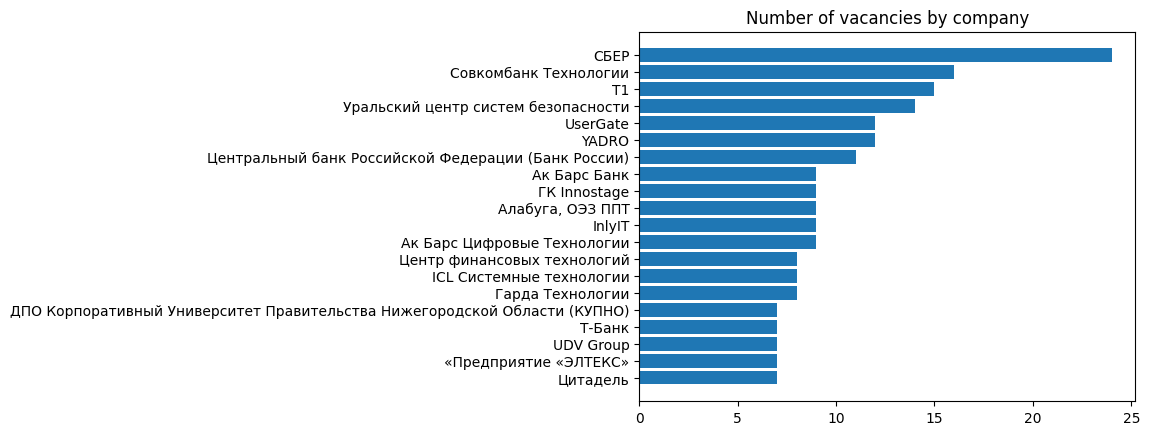

In [120]:
company_counts = data['company'].value_counts(ascending=True).tail(20)
plt.barh(y=company_counts.index, width=company_counts)
plt.title('Number of vacancies by company')
plt.show()

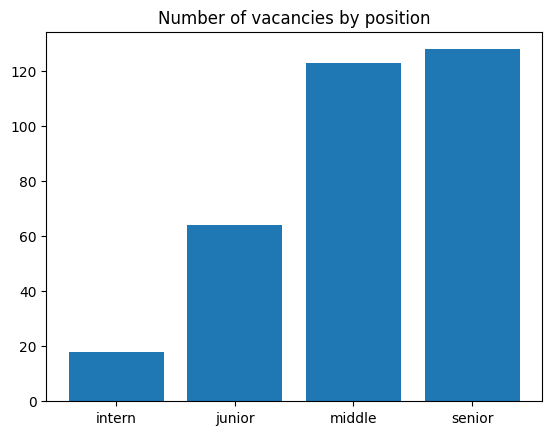

In [123]:
def position_stats():
    position_num = {}
    for position in ['intern', 'junior', 'middle', 'senior']:
        position_data = data[data['position'].apply(lambda x: position in x if pd.notnull(x) else False)]
        position_num[position] = position_data.shape[0]
    return position_num

position_stats_series = pd.Series(position_stats())
plt.bar(x=position_stats_series.index, height=position_stats_series)
plt.title('Number of vacancies by position')
plt.show()

In [124]:
def category_stats(category):
    skill_persentage = {}
    category_data = data[data['category'].apply(lambda x: category in x if pd.notnull(x) else False)]
    for skill in SKILLS[category].keys():
        skill_data = category_data[category_data['skills'].apply(lambda x: skill in x if pd.notnull(x) else False)]
        if skill_data.shape[0] != 0:
            skill_persentage[skill] = skill_data.shape[0] / category_data.shape[0]
    return dict(sorted(skill_persentage.items(), key=lambda item: item[1], reverse=True))

In [125]:
category_stats('web')

{'javascript': 0.4583333333333333,
 'react': 0.3680555555555556,
 'typescript': 0.21180555555555555,
 'vue.js': 0.1284722222222222,
 'angular': 0.041666666666666664,
 'next.js': 0.03819444444444445,
 'wordpress': 0.003472222222222222}

In [126]:
def plot_category_stats(category):
    category_stats_series = pd.Series(category_stats(category)) * 100
    plt.bar(x=category_stats_series.index, height=category_stats_series)
    plt.title(f"{category} category statistics")
    plt.ylabel("% of vacancies in category")
    plt.show()

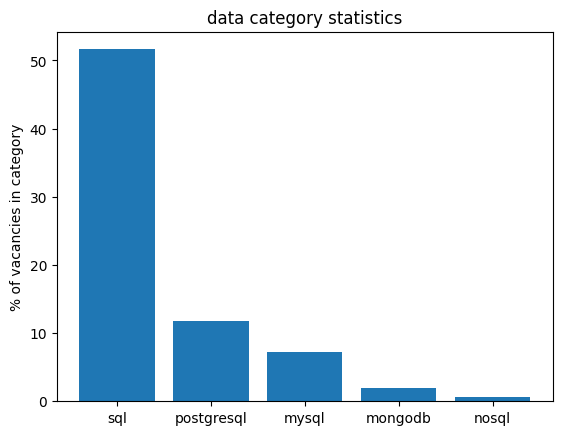

In [127]:
plot_category_stats('data')

In [6]:
def salary_by_city(df):
    with_rub_salary = df[df['salary_currency'] == 'RUR']
    return with_rub_salary.groupby(['location'])['salary'].mean().apply(round).sort_values(ascending=False)

In [78]:
salary_by_city(data)

location
Москва             198222
Санкт-Петербург    127550
Казань             127439
Нижний Новгород    113699
Новосибирск        111520
Екатеринбург       109363
Name: salary, dtype: int64

In [129]:
def plot_salary_by_city(salary_by_city_series, title):
    plt.barh(y=salary_by_city_series.index, width=salary_by_city_series)
    plt.title(title)
    plt.xlabel("RUB")
    plt.show()

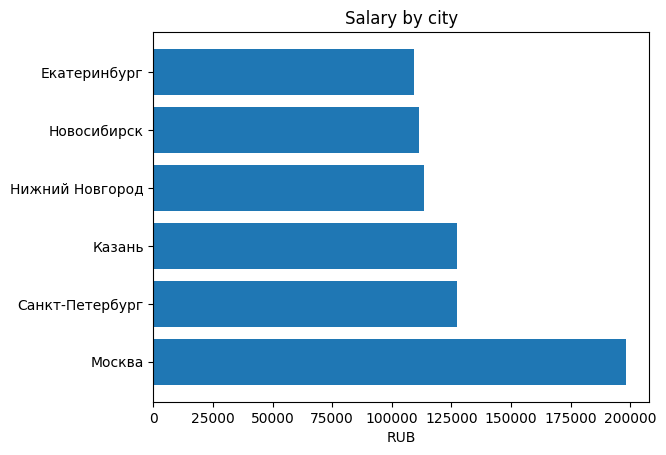

In [90]:
plot_salary_by_city(salary_by_city(data), "Salary by city")

In [91]:
def salary_by_city_in_category(category):
    category_data = data[data['category'].apply(lambda x: category in x if pd.notnull(x) else False)]
    return salary_by_city(category_data)

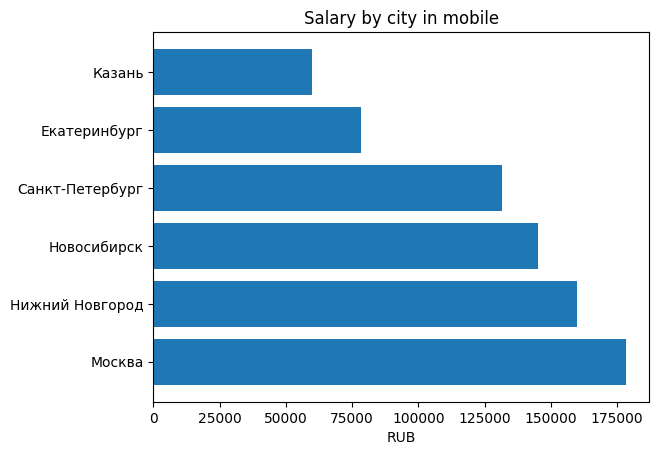

In [130]:
plot_salary_by_city(salary_by_city_in_category('mobile'), "Salary by city in mobile")

In [100]:
def get_salary(skill):
    category_with_rub = data[(data['skills'].apply(lambda x: skill in x if pd.notnull(x) else False)) & (data['salary_currency'] == 'RUR')]
    return category_with_rub['salary'].mean()

def salary_by_skill(category):
    skill_salary = {}
    for skill in SKILLS[category].keys():
        res = get_salary(skill)
        if pd.notnull(res):
            skill_salary[skill] = round(res)
    return dict(sorted(skill_salary.items(), key=lambda item: item[1], reverse=True))

In [101]:
def plot_salary_by_skill(category):
    salary_by_skill_series = pd.Series(salary_by_skill(category))
    plt.bar(x=salary_by_skill_series.index, height=salary_by_skill_series)
    plt.title(f"Salary by skill in {category}")
    plt.ylabel("RUB")
    plt.show()

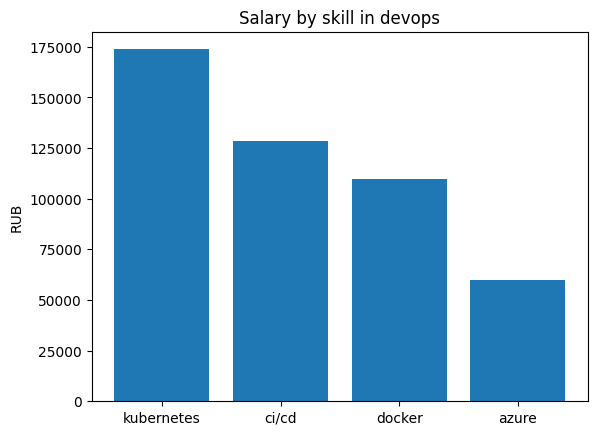

In [107]:
plot_salary_by_skill('devops')

In [133]:
data

,job_title,company,location,responsibilities,requirements,salary_from,salary_to,salary_currency,posted_date,url,category,skills,position,experience,education,salary
0,Младший специалист по тестированию,Панина Анастасия Александровна,Москва,1. Функциональное и нефункциональное тестирова...,Уверенное владение техниками тест-дизайна (экв...,70000.0,NaN,RUR,2025-05-05,https://hh.ru/vacancy/120226828,['data'],['sql'],['junior'],NaN,NaN,70000.0
1,Manual QA Engineer (Middle),ЮНИРЕСТ,Москва,Проводить ручное тестирование (функциональное ...,Имеешь опыт ручного тестирования от 2-х лет. И...,NaN,NaN,NaN,2025-04-21,https://hh.ru/vacancy/119771963,['qa'],NaN,['middle'],2.0,NaN,NaN
2,Intern QA Manual,IBS,Москва,В обязанности будут входить все этапы тестиров...,Способность быстро обучаться. Понимание методо...,NaN,NaN,NaN,2025-05-06,https://hh.ru/vacancy/120277319,"['tools', 'qa']",['jira'],['intern'],NaN,NaN,NaN
3,Manual QA engineer,Finstar Financial Group,Москва,Подготовка тестовых данных. Анализ результатов...,Опыт тестирования сложных систем – от 3 лет. О...,NaN,NaN,NaN,2025-05-05,https://hh.ru/vacancy/120227969,['qa'],NaN,NaN,3.0,NaN,NaN
4,Директор по цифровой трансформации (CDTO),Кадровое Бюро Охота,Москва,Разработка и внедрение стратегии цифровой тран...,...SAP системах и т. д. Широкий кругозор в обл...,NaN,NaN,NaN,2025-05-02,https://hh.ru/vacancy/120166622,['security'],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Ведущий специалист по информационной безопасности,Эгида,Казань,Составление регламентов безопасности при работ...,Дружелюбность и коммуникативность приветствует...,NaN,NaN,NaN,2025-04-28,https://hh.ru/vacancy/120040813,['security'],NaN,['senior'],NaN,NaN,NaN
1196,Архитектор,Т-Банк,Казань,Формулировать технические цели для команды. Пр...,Есть опыт построения архитектуры на уровне при...,NaN,NaN,NaN,2025-04-22,https://hh.ru/vacancy/118127542,NaN,NaN,['senior'],NaN,NaN,NaN
1197,Главный инженер-эксперт по ИБ,Ак Барс Банк,Нижний Новгород,Настройка и внедрение систем по обеспечению се...,Навыки работы с системой мониторинга Zаbbix. П...,NaN,NaN,NaN,2025-04-23,https://hh.ru/vacancy/119870607,['security'],NaN,NaN,NaN,NaN,NaN
1198,Тестировщик Java/AQA Java с нуля (стажер),Aston,Казань,Изучение теории с еженедельными проверками изу...,Уверенные знания теории тестирования. Понимани...,NaN,NaN,NaN,2025-04-22,https://hh.ru/vacancy/119809682,"['data', 'mobile', 'backend', 'web', 'qa']","['java', 'sql']",['intern'],NaN,NaN,NaN
